In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(x_train, y_train), (xtest, ytest) = boston_housing.load_data()

print(x_train.shape)
print('Input: ', x_train[0])
print('output: ', y_train[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)
Input:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
output:  15.2


In [7]:
boston_features = {
    'Average Number of Rooms': 5
}

x_train_1d = x_train[:, boston_features['Average Number of Rooms']]
print(x_train_1d.shape)
print(x_train_1d[0])
xtest_1d = xtest[:, boston_features['Average Number of Rooms']]

(404,)
6.142


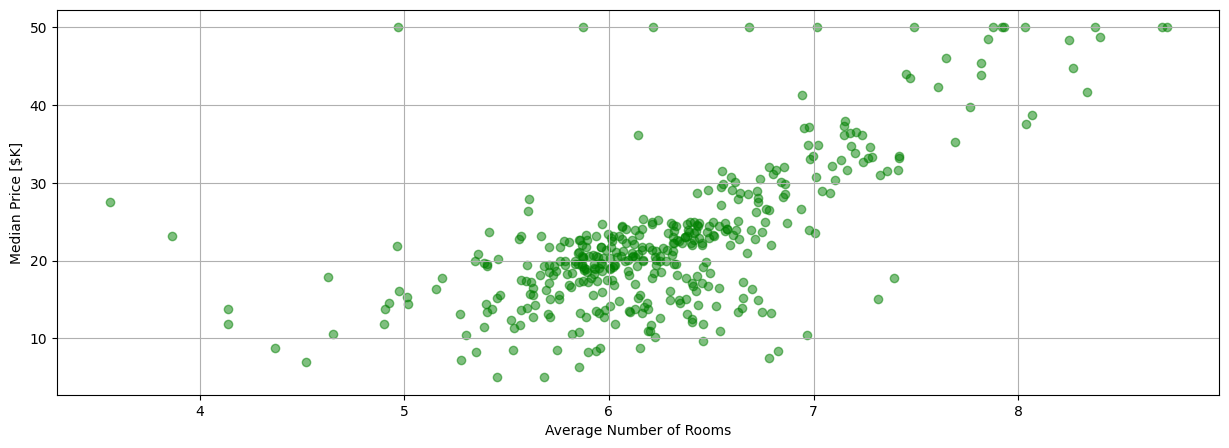

In [8]:
plt.figure(figsize=(15, 5))
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid('on')
plt.scatter(x_train_1d, y_train, color='green', alpha=0.5)

In [10]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.summary()

c:\Users\PC\Desktop\project\bootcamp\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss='mse')

In [12]:
history = model.fit(
    x_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3
)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 261.9321 - val_loss: 314.0735
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 241.5236 - val_loss: 294.4212
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 224.6807 - val_loss: 276.2425
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 208.9197 - val_loss: 258.9889
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 194.0185 - val_loss: 242.5834
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 179.9434 - val_loss: 227.0132
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 166.6873 - val_loss: 212.2750
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 154.2462 - val_loss: 198.3665
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 142.6165 - val_loss: 185.2852
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 131.7940 - val_loss: 173.0288
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121.7738 - val_loss: 161.5938
Epoch 12/101
18/18 

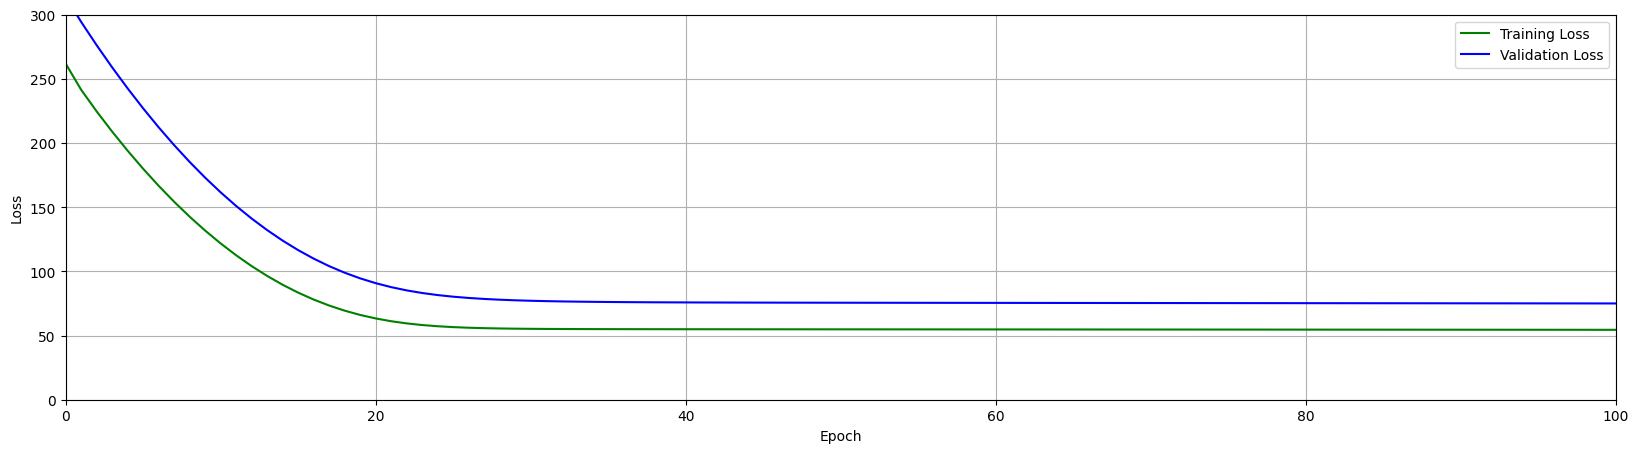

In [13]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
plot_loss(history)

In [15]:
x = np.array([3,4,5,6,7])
y_pred = model.predict(x)
print('y_pred : ', y_pred)
for idx in range(len(x)):
    predicted_price = y_pred[idx].item()
    print(f'Predicted price of a home with {x[idx]} rooms: ${int(predicted_price * 10) / 10}K')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
y_pred :  [[11.33058 ]
 [14.665426]
 [18.000273]
 [21.335121]
 [24.669968]]
Predicted price of a home with 3 rooms: $11.3K
Predicted price of a home with 4 rooms: $14.6K
Predicted price of a home with 5 rooms: $18.0K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


In [16]:
x = np.linspace(3, 9, 10)
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


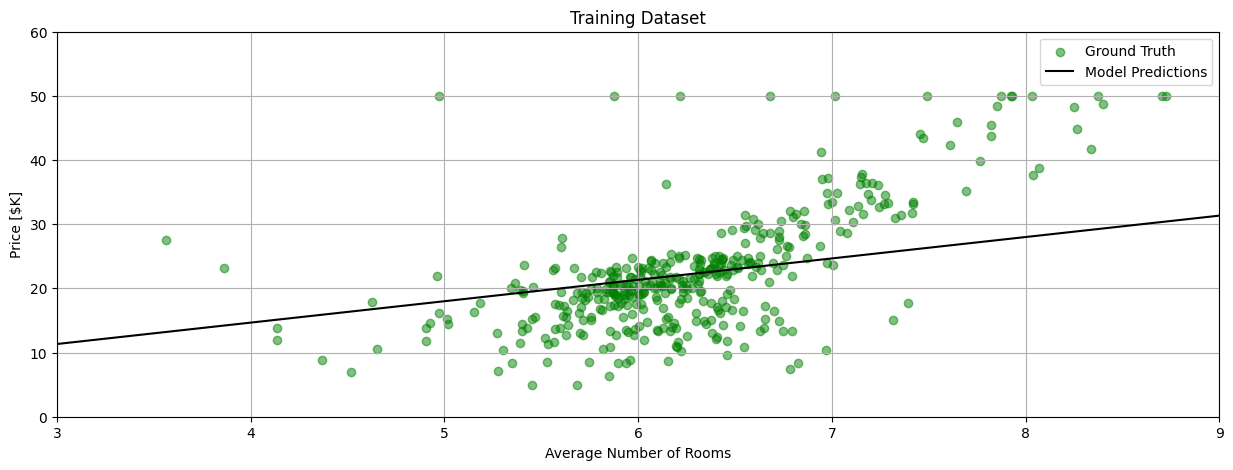

In [18]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15, 5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    
plot_data(x_train_1d, y_train, x, y, title='Training Dataset')

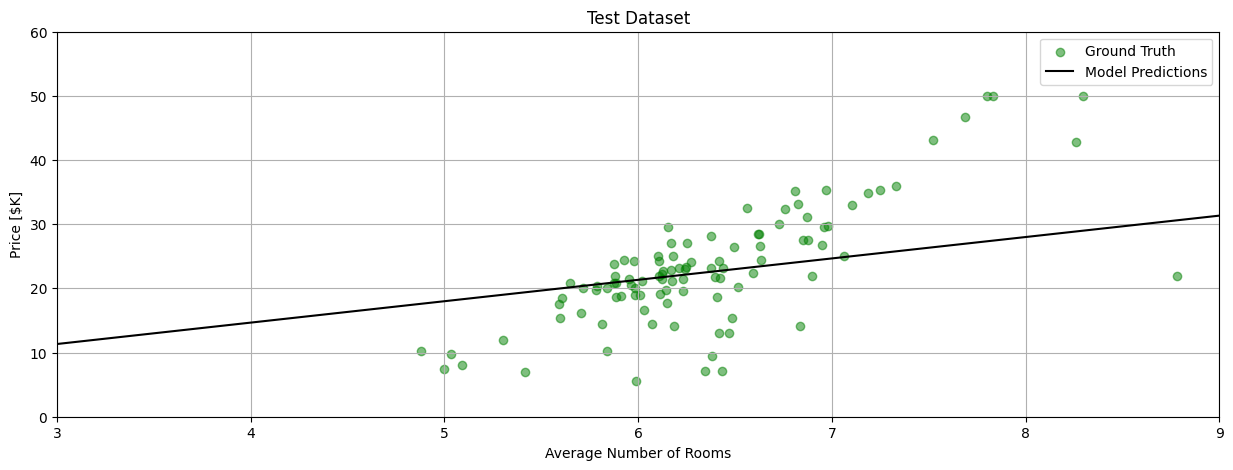

In [19]:
plot_data(xtest_1d, ytest, x, y, title='Test Dataset')